
Python Machine Learning Linear Regression with Scikit- learn
October 31, 2017 / RP	

What is a “Linear Regression”-

Linear regression is one of the most powerful and yet very simple machine learning algorithm. Linear regression is used for cases where the relationship between the dependent and one or more of the independent variables is supposed to be linearly correlated in the following fashion-

Y = b0 + b1*X1 + b2*X2 + b3*X3 + …..

Here Y is the dependent variable and X1, X2, X3 etc are independent variables. The purpose of building a linear regression model is to estimate the coefficients b0, b1, b2 et cetera that provides the least error rate in the prediction. More on the error will be discussed later in this article.

In the above equation, b0 is the intercept, b1 is the coefficient for variable X1, b2 is the coefficient for the variable X2 and so on…

What is a “Simple Linear Regression” and “ Multiple Linear Regression”?

When we have only one independent variable, resulting regression is called a “Simple Linear Regression” when we have 2 or more independent variables the resulting regression is called “Multiple Linear Regression”

What are the requirements for the dependent and independent variables in the regression analysis?

The dependent variable in linear regression is generally Numerical and Continuous such as sales in dollars, gdp, unemployment rate, pollution level, amount of rainfall etc. On the other hand, the independent variables can be either numeric or categorical. However, please note that the categorical variables will need to be dummy coded before we can use these variables for building a regression model in the sklearn library of Python.

What are some of the real world usage of linear regression?

As we discussed earlier, this is one of the most commonly used algorithm in ML. Some of the use cases are listed below-

Example 1-

Predict sales amount of a car company as a function of the # of models, new models, price, discount,GDP, interest rate, unemployment rate, competitive prices etc.

Example 2-

Predict weight gain/loss of a person as a function of calories intake, junk food, genetics, exercise time and intensity, sleep, festival time, diet plans, medicines etc.

Example 3-

Predict house prices as a function of sqft, # of rooms, interest rate, parking, pollution level, distance from city center, population mix etc.

Example 4-

Predict GDP growth rate as a function of inflation, unemployment rate, investment, new business, weather pattern, resources, population

How do we evaluate linear regression model’s performance? 

There are many metrics that can be used to evaluate a linear regression model’s performance and choose the best model.  Some of the most commonly used metrics are-

Mean Square Error (MSE)- This is an error and lower the amount the better it is. It is defined using the below formula

 

Mean Squared Error (MSE)

 

Mean Absolute Percent Error (MAPE)- This is an error and lower the amount the better it is. It is defined using the below formula

Mean Absolute Percent Error (MAPE)

R Square– This is called coefficient of determination and provides a gauge of model’s explaining power. For example, for a linear regression model with a RSquare of 0.70 or 70% would imply that 70% of the variation in the dependent variable can be explained by the model that has been built.

How do we build a linear regression model in Python?

In this exercise, we will build a linear regression model on Boston housing data set which is an inbuilt data in the scikit-learn library of Python. However, before we go down the path of building a model, let’s talk about some of the basic steps in any machine learning model in Python

In most cases, any of the machine learning algorithm in sklearn library will follow the following steps-

    Split original data into features and label. In other words,  create dependent variable and set of independent variables in two different arrays separately. Please note this requirement exists only for the supervised learning ( where a dependent variable is present). For unsupervised learning, we don’t have a dependent variable and hence there is no need to split the data into features and label
    Scale or Normalize the features and label data. Please note that this is not a necessity for all algorithms and/or datasets. Also we are assuming that all the data cleaning and feature engineering  such as missing value treatment, outlier treatment, bogus values fixes and dummy coding of the categorical variables have been done before doing this step
    Create training and test data sets from the original data. Training data set will be used for training the model whereas the test data set will be used for validating the accuracy or the prediction power of the model on a new dataset. We would need to split both the features and labels into the training and the test split.
    Create an instance of the model object that will be used for the modelling exercise. This process is called “Instantiation”.  In simpler words, during this process we are loading the model package necessary to build a model.
    “Fit” the model instance on the training data. During this step, the model is leveraging both the features and the label information provided in the training data to connect the features to label. Please note that we are going with all the default option during fitting of the model.  As you get more expertise you may want to play with some parameter optimization, however we are just going with the defaults for now.
    “Predict” using the model instance on test data. During this step, the model is only using the features information to predict the label.
    Based on the predictions generated on the test data, we generate key performance indicators of  model performance. This generally includes metrics such as Precision, Recall F score, Confusion Matrix, Accuracy, Mean Square Error (MSE), Root Mean Square Error (RMSE), Mean Absolute Error (MAE), Area Under the Curve (AUC), Mean Absolute Percentage error (MAPE) etc.
    Once the model performance is evaluated and its deemed to be satisfactory for the purpose of the business uses, we implement the model for new unseen data


In [45]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [46]:
#Import Boston Housing Dataset
from sklearn import datasets
boston=datasets.load_boston()
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='|S7')

In [47]:
print (boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [48]:
boston.keys()
boston.data.shape
boston.feature_names
boston.target

['filename', 'data', 'target', 'DESCR', 'feature_names']

(506, 13)

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='|S7')

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [49]:
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df.head()
boston_df['House_price']=boston.target
boston_df.head()
np.round(boston_df.describe(),2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_price
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


(<Figure size 1440x1440 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x16443c50>)

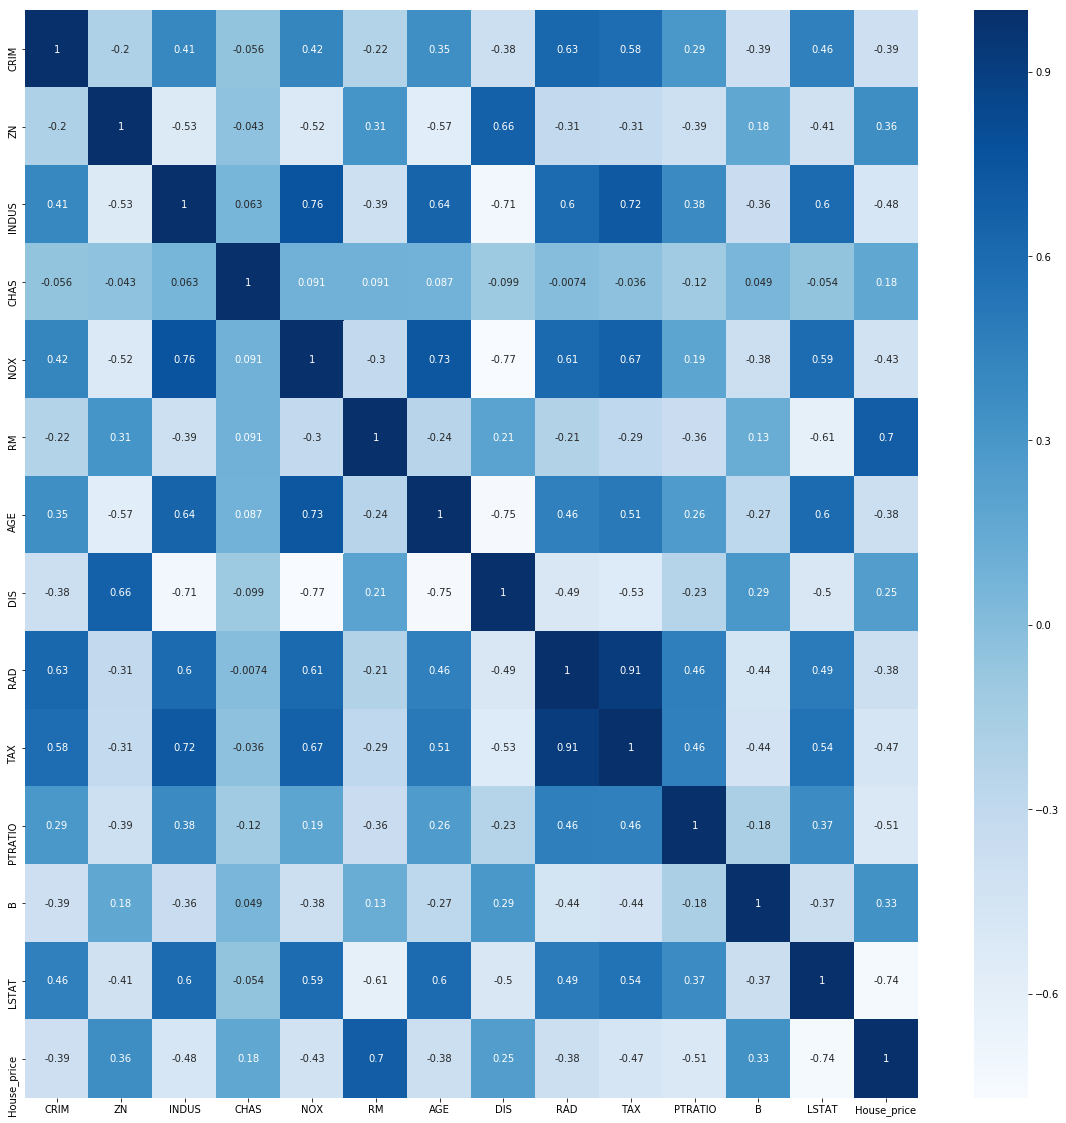

In [50]:
x=boston_df.corr()
x
plt.subplots(figsize=(20,20))
sns.heatmap(x,cmap='Blues',annot=True)
plt.show()

In [51]:
x=boston_df.drop('House_price',axis=1)
y=boston_df['House_price']
x.head()
y.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: House_price, dtype: float64

In [52]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.25,random_state=1)
train_x.shape
test_x.shape
train_y.shape
test_y.shape

(379, 13)

(127, 13)

(379,)

(127,)

In [53]:
#Import model object andcreate an instance of the model
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [54]:
#Apply the Fit
lm.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [55]:
#Predict
predict_test=lm.predict(test_x)

In [56]:
print(lm.coef_)
df_m=pd.DataFrame({'features':x.columns,'coeff':lm.coef_})
df_m=df_m.sort_values(by=['coeff'])
df_m

[-1.14428903e-01  5.71299780e-02  3.83002824e-02  2.42854641e+00
 -2.12326236e+01  2.87723416e+00  6.91118094e-03 -1.47158266e+00
  3.05784197e-01 -1.06750361e-02 -9.96138270e-01  6.27746234e-03
 -5.57414427e-01]


,coeff,features
4,-21.232624,NOX
7,-1.471583,DIS
10,-0.996138,PTRATIO
12,-0.557414,LSTAT
0,-0.114429,CRIM
9,-0.010675,TAX
11,0.006277,B
6,0.006911,AGE
2,0.038300,INDUS
1,0.057130,ZN


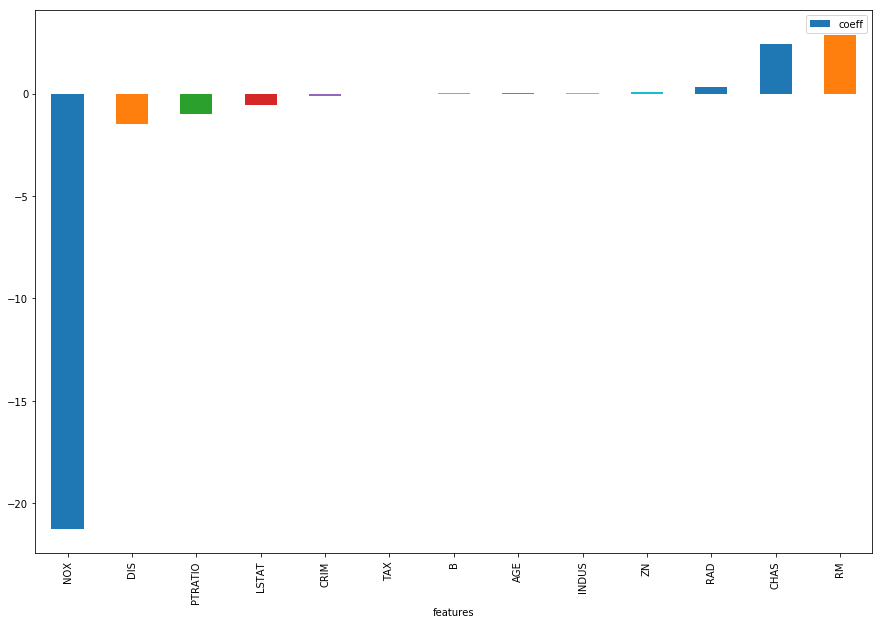

In [57]:
# plot the feature importance in a bar chart format
df_m.plot(x='features',y='coeff',kind='bar',figsize=(15,10))
plt.show()

Let’s now generate some of the model performance metrics  such as R2, MSE and MAE. All of these model performance metrics can be generated using the scikit-learn inbuilt packages such as ‘metrics’.

In [58]:
print("RSquare Value for TEST data is-")
np.round(lm.score(test_x,test_y)*100,0)
print("RSquare Value for TRAIN data is-")
np.round(lm.score(train_x,train_y)*100,0)

RSquare Value for TEST data is-


78.0

RSquare Value for TRAIN data is-


72.0

Mean Square Error (MSE)

In [59]:
print ("Mean Square Error (MSE) for TEST data is")
np.round(metrics.mean_squared_error(test_y,predict_test),0)

Mean Square Error (MSE) for TEST data is


22.0

Mean Absolute Error (MAE)

In [60]:
print ("Mean Absolute Error (MAE) for TEST data is")
np.round(metrics.mean_absolute_error(test_y,predict_test),0)

Mean Absolute Error (MAE) for TEST data is


4.0

In [61]:
fdf=pd.concat([test_x,test_y],1)
fdf['Predicted']=np.round(predict_test,1)
fdf['Prediction_Error']=fdf['House_price']-fdf['Predicted']
fdf.describe()
fdf.head()
fdf.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_price,Predicted,Prediction_Error
count,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000
mean,3.041565,10.893701,10.888268,0.031496,0.556552,6.370906,68.048031,3.707335,9.622047,417.354331,18.388189,351.807402,11.808189,23.094488,23.282677,-0.188189
std,5.689799,22.892228,6.836400,0.175346,0.110293,0.742272,27.868737,2.010475,8.659273,166.007483,2.240947,96.373458,6.784060,9.992230,7.628613,4.695601
min,0.010960,0.000000,1.250000,0.000000,0.389000,4.138000,2.900000,1.178100,1.000000,193.000000,13.000000,3.650000,1.920000,6.300000,5.000000,-8.100000
25%,0.076945,0.000000,4.710000,0.000000,0.462000,5.999500,44.900000,2.101800,4.000000,288.000000,16.900000,371.250000,6.630000,16.650000,18.000000,-3.200000
50%,0.289550,0.000000,8.560000,0.000000,0.538000,6.312000,73.300000,2.892700,5.000000,370.000000,18.900000,389.960000,10.400000,22.000000,21.900000,-0.800000
75%,3.301110,0.000000,18.100000,0.000000,0.624000,6.630000,93.950000,5.307850,24.000000,666.000000,20.200000,396.255000,15.540000,25.150000,27.300000,2.000000
max,37.661900,95.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,30.810000,50.000000,42.700000,15.800000


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_price,Predicted,Prediction_Error
307,0.04932,33.0,2.18,0.0,0.472,6.849,70.3,3.1827,7.0,222.0,18.4,396.90,7.53,28.2,32.4,-4.2
343,0.02543,55.0,3.78,0.0,0.484,6.696,56.4,5.7321,5.0,370.0,17.6,396.90,7.18,23.9,28.0,-4.1
47,0.22927,0.0,6.91,0.0,0.448,6.030,85.5,5.6894,3.0,233.0,17.9,392.74,18.80,16.6,18.1,-1.5
67,0.05789,12.5,6.07,0.0,0.409,5.878,21.4,6.4980,4.0,345.0,18.9,396.21,8.10,22.0,21.6,0.4
362,3.67822,0.0,18.10,0.0,0.770,5.362,96.2,2.1036,24.0,666.0,20.2,380.79,10.19,20.8,18.9,1.9


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_price,Predicted,Prediction_Error
41,0.12744,0.0,6.91,0.0,0.448,6.770,2.9,5.7209,3.0,233.0,17.9,385.41,4.84,26.6,27.3,-0.7
361,3.83684,0.0,18.10,0.0,0.770,6.251,91.1,2.2955,24.0,666.0,20.2,350.65,14.19,19.9,18.7,1.2
289,0.04297,52.5,5.32,0.0,0.405,6.565,22.9,7.3172,6.0,293.0,16.6,371.72,9.51,24.8,27.3,-2.5
498,0.23912,0.0,9.69,0.0,0.585,6.019,65.3,2.4091,6.0,391.0,19.2,396.90,12.92,21.2,21.2,0.0
293,0.08265,0.0,13.92,0.0,0.437,6.127,18.4,5.5027,4.0,289.0,16.0,396.90,8.58,23.9,26.0,-2.1


Using statmodels to build linear regression

In [62]:
import statsmodels.formula.api as smf
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [64]:
model=smf.ols('House_price ~ CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT',data=boston_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            House_price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 19 Jan 2019   Prob (F-statistic):          6.72e-135
Time:                        22:28:21   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

In [65]:
#Remove insigrnifacant variables INDUS and AGE
model=smf.ols('House_price ~ CRIM+ZN+CHAS+NOX+RM+DIS+RAD+TAX+PTRATIO+B+LSTAT',data=boston_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            House_price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Sat, 19 Jan 2019   Prob (F-statistic):          5.54e-137
Time:                        22:29:41   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3411      5.067      7.171      0.0

In [66]:
robust_model=model.get_robustcov_results()
print(robust_model.summary())

                            OLS Regression Results                            
Dep. Variable:            House_price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     105.7
Date:                Sat, 19 Jan 2019   Prob (F-statistic):          4.05e-122
Time:                        22:32:16   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3411      7.747      4.691      0.0